In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Credit Card Fraud Analysis
https://www.kaggle.com/mlg-ulb/creditcardfraud

In [2]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


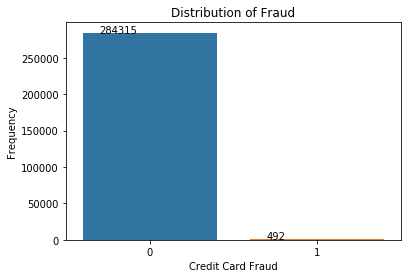

In [3]:
ax = sns.countplot(x="Class", data=data)
plt.title('Distribution of Fraud')
plt.xlabel('Credit Card Fraud')
plt.ylabel('Frequency')

for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

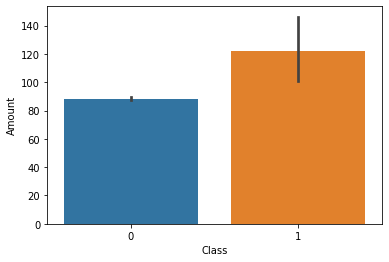

In [4]:
sns.barplot(x='Class', y='Amount', data=data)

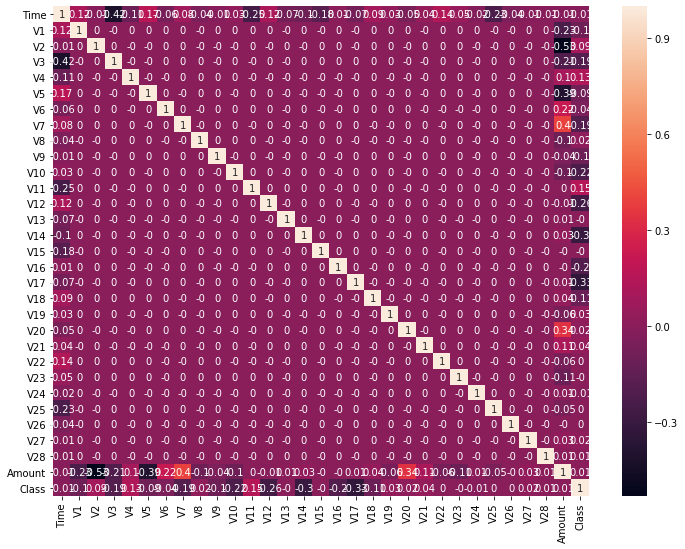

In [5]:
corr = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(round(corr,2), annot =True,ax=ax)
plt.show()

In [6]:
# Separate input features and target
y = data.Class
X = data.drop('Class', axis=1)

# setting up testing and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
columns = X_train.columns

In [7]:
#SMOTE - Oversampling only training data 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)
X_train = pd.DataFrame(data=X_train,columns=columns)
y_train = pd.DataFrame(data=y_train,columns=['Class'])
y_train.tail()

,Class
426485,1
426486,1
426487,1
426488,1
426489,1


,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,94838.202258,47484.015786,0.0,54230.0,84711.0,139333.0,172792.0
1,492.0,80746.806911,47835.365138,406.0,41241.5,75568.5,128483.0,170348.0


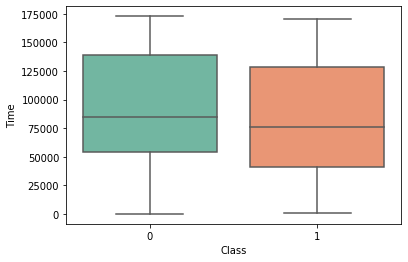

In [8]:
sns.boxplot(x="Class", y="Time",data=data, palette='Set2')
data.groupby("Class").Time.describe()

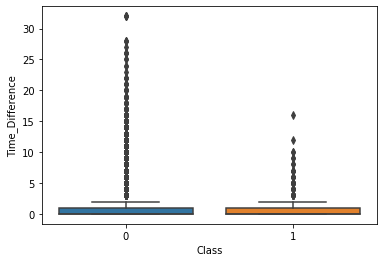

In [9]:
#create the time difference feature
data['Time_Difference'] = data['Time']-data['Time'].shift()
sns.boxplot(x="Class", y="Time_Difference",data=data)

In [19]:
#train = pd.concat(X_train, y_train,axis=1)
#sns.boxplot(x="Class", y="Amount", data=train)
#train.groupby('Class').Amount.describe()

In [13]:
# Define the model
model = LogisticRegression(solver='lbfgs')

# Fit and predict on Testing data
model = model.fit(X_train,y_train.values.ravel())
y_pred = model.predict(X_test)
print("First y_pred: ",y_pred[:10])
print('Accuracy of logistic regression classifier on test set: {:.2f}'
      .format(model.score(X_test, y_test)))

First y_pred:  [0 0 0 0 0 0 0 1 0 0]
Accuracy of logistic regression classifier on test set: 0.98


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [14]:
#Make class probability predictions
model.predict_proba(X_test)[:10]

array([[9.44101431e-01, 5.58985688e-02],
       [9.98764685e-01, 1.23531453e-03],
       [8.54922588e-01, 1.45077412e-01],
       [9.97718913e-01, 2.28108717e-03],
       [9.82749139e-01, 1.72508610e-02],
       [9.98283712e-01, 1.71628815e-03],
       [8.79435286e-01, 1.20564714e-01],
       [2.20726456e-03, 9.97792735e-01],
       [9.99253131e-01, 7.46869248e-04],
       [9.96945927e-01, 3.05407296e-03]])

Text(0.5, 1, 'Confusion matrix for validation set')

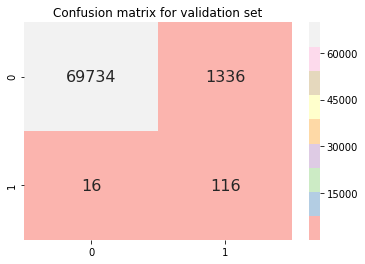

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, range(2),range(2))
sns.heatmap(cm, annot=True, fmt='g', annot_kws={"size": 16}, cmap="Pastel1")
plt.title('Confusion matrix for validation set')